In [44]:
import pandas as pd
import numpy as np

df =  pd.read_csv('full.csv', delimiter=',')

In [45]:
df.head()

,amount,age,sex,ins_type,speciality,id,treatments,types,target
0,330.97,53.570385,0,1,1,ID_1,A_178 A_1884 A_1 A_168 A_172 A_174,AA_10 AA_2 AA_2 AA_10 AA_10 AA_10,0
1,455.20,83.382720,1,1,1,ID_2,A_765 A_764 A_1257 A_777 A_802 A_797 <UNK> A_...,AA_13 AA_13 AA_3 AA_13 AA_13 AA_13 AA_1 AA_3 ...,0
2,199.53,69.567510,1,1,1,ID_3,A_1978 A_710 A_1677 A_1701 A_1 A_585 <UNK> A_...,AA_2 AA_12 AA_5 AA_5 AA_2 AA_3 AA_1 AA_3 AA_1...,0
3,142.85,69.556330,1,1,1,ID_4,A_1257 A_545 A_1128 A_1 A_1191 A_2001 <UNK> A...,AA_3 AA_3 AA_3 AA_2 AA_3 AA_2 AA_1 AA_2 AA_2,0
4,168.87,18.873434,0,1,1,ID_5,A_737 A_20 A_1257 A_1191 A_642 A_1 <UNK> A_73...,AA_13 AA_8 AA_3 AA_3 AA_3 AA_2 AA_1 AA_13 AA_...,0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381013 entries, 0 to 381012
Data columns (total 9 columns):
amount        381013 non-null float64
age           381013 non-null float64
sex           381013 non-null int64
ins_type      381013 non-null int64
speciality    381013 non-null int64
id            381013 non-null object
treatments    381013 non-null object
types         381013 non-null object
target        381013 non-null int64
dtypes: float64(2), int64(4), object(3)
memory usage: 26.2+ MB


In [47]:
df.describe()

,amount,age,sex,ins_type,speciality,target
count,381013.000000,381013.000000,381013.000000,381013.000000,381013.000000,381013.000000
mean,193.609024,63.216714,0.522392,0.993029,0.993029,0.014978
std,399.281934,18.274878,0.499499,0.083200,0.083200,0.121467
min,0.560000,0.037582,0.000000,0.000000,0.000000,0.000000
25%,45.570000,57.359340,0.000000,1.000000,1.000000,0.000000
50%,100.920000,67.555115,1.000000,1.000000,1.000000,0.000000
75%,224.150000,75.040360,1.000000,1.000000,1.000000,0.000000
max,56131.270000,106.495600,1.000000,1.000000,1.000000,1.000000


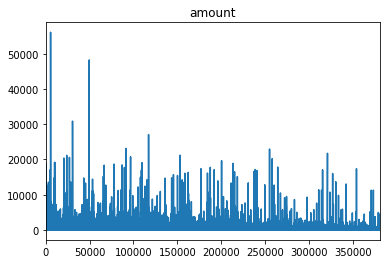

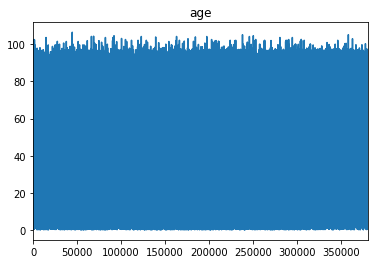

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
amount_df = df['amount']
plt.title('amount')
amount_df.plot()

fig = plt.figure()
age_df = df['age']
plt.title('age')
age_df.plot()

In [49]:
colums = list(df.columns.values)
print(colums)

['amount', 'age', 'sex', 'ins_type', 'speciality', 'id', 'treatments', 'types', 'target']


In [50]:
df.iloc[:,7].value_counts().count()

149954

Так как __id__ у всех разный просто удаляем этот столбец 

а столбцы __treatments__ и __types__ не просто бинамиризуем, потому что почти каждый второй уникален, альтернативный вариант занумеровать их, но тогда методы работать не будут, поэтому пока что так а дальше помотрим [сюда](https://istina.msu.ru/media/publications/article/972/9eb/7537819/sw-factors-dyakonov.pdf)

нормализовывать данные или нет пока что под вопросом(__amount__ и __age__)

In [53]:
del df['id']

In [51]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df.treatments)
df["treatments_le"] = le.transform(df.treatments) 

le.fit(df.types)
df["types_le"] = le.transform(df.types)

del df['treatments']
del df['types']

In [54]:
df.head()

,amount,age,sex,ins_type,speciality,target,treatments_le,types_le
0,330.97,53.570385,0,1,1,0,110225,17517
1,455.20,83.382720,1,1,1,0,214008,41795
2,199.53,69.567510,1,1,1,0,136578,69712
3,142.85,69.556330,1,1,1,0,73858,117896
4,168.87,18.873434,0,1,1,0,203713,56356


In [ ]:
one = preprocessing.OneHotEncoder(sparse = False)
new_one_f = one.fit_transform(df.treatments_le.values.reshape(-1,1))
tpm = pd.DataFrame(new_one_f, colums = ['treatments = ' + str(i) for i in range(new_one_f.shape[1])])
df = pd.concat([df, tmp] , axis = 1)
del df.treatments

new_one_f = one.fit_transform(df.types_le.values.reshape(-1,1))
tpm = pd.DataFrame(new_one_f, colums = ['types = ' + str(i) for i in range(new_one_f.shape[1])])
df = pd.concat([df, tmp] , axis = 1)
del df.types